        측정일시  측정소명  미세먼지농도(㎍/㎥)  초미세먼지농도(㎍/㎥)
0 2022-01-01   강남구         25.0          12.0
1 2022-01-01   홍릉로         27.0          16.0
2 2022-01-01    행주         27.0          16.0
3 2022-01-01    항동         27.0          14.0
4 2022-01-01  한강대로         34.0          14.0


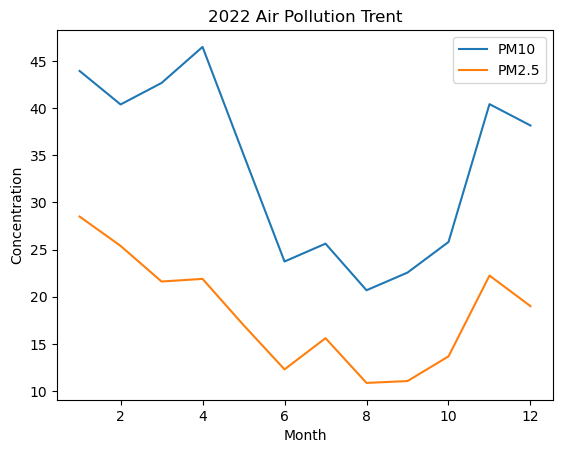

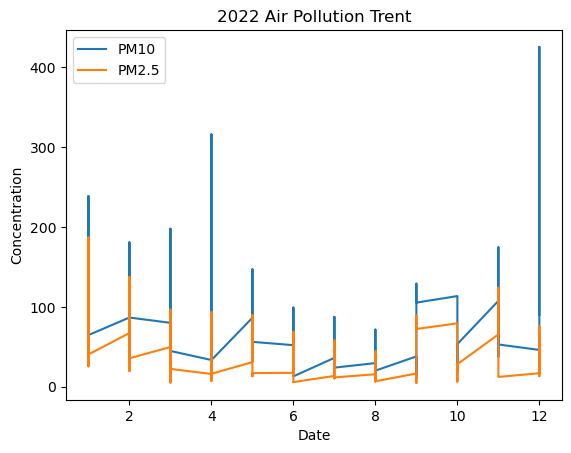

<Figure size 2000x800 with 0 Axes>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# data path
data_path = '일별평균대기오염도_2022.csv'

# readCsv
df = pd.read_csv(data_path,encoding='cp949')

# field select
df = df[['측정일시','측정소명','미세먼지농도(㎍/㎥)','초미세먼지농도(㎍/㎥)']]

# 결측치 처리
df = df.dropna()

# 측정일시 열의 data 타입 datetime으로 변경
df['측정일시'] =pd.to_datetime(df['측정일시'],format='%Y%m%d')
print(df.head())

# 연도별 미세먼지와 초미세먼지 농도 평균 계산
df_monthly = df.resample('M',on='측정일시').mean(numeric_only=True)

# 그래프 그리기(월별)
plt.plot(df_monthly.index.month, df_monthly['미세먼지농도(㎍/㎥)'],label='PM10')
plt.plot(df_monthly.index.month, df_monthly['초미세먼지농도(㎍/㎥)'],label='PM2.5')
plt.legend()
plt.xlabel("Month")
plt.ylabel("Concentration")
plt.title("2022 Air Pollution Trent")
plt.show()

# 연도별 미세먼지와 초미세먼지 농도 평균 계산
df_daily = df.resample('D',on='측정일시').sum(numeric_only=True)

# 일평균 대기오염도 계산
df_daily['미세먼지농도(㎍/㎥)'] /= 24
df_daily['초미세먼지농도(㎍/㎥)'] /= 24

# 그래프 그리기(일별)
plt.plot(df_daily.index.month, df_daily['미세먼지농도(㎍/㎥)'],label='PM10')
plt.plot(df_daily.index.month, df_daily['초미세먼지농도(㎍/㎥)'],label='PM2.5')
plt.legend()
plt.figure(figsize=(20,8))
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("2022 Air Pollution Trent")
plt.show()